# Credit Card Fraud Detection
- https://www.kaggle.com/mlg-ulb/creditcardfraud
- https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/BaselineModeling.html

"The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions."

# <a id='0'>Content</a>
- <a href='#1'>Load packages</a>
- <a href='#2'>Import Data</a>
- <a href='#3'>Inspect Data</a>
    - <a href='#31'>Benford's Law vs. Credit Card Transactions</a> 
    - <a href='#32'>Missing Data</a> 
- <a href='#4'>Balance Dataset</a>
    - <a href='#41'>Imbalanced Data</a>
    - <a href='#42'>Applying SMOTE</a> 
- <a href='#5'>Models</a>
    - <a href='#51'>Split Dataset into Train/Test</a>
    - <a href='#52'>Logistic Regression</a>
    - <a href='#53'>Naive Bayes</a>
    - <a href='#54'>Decision Tree</a>
    - <a href='#55'>Random Forest</a>
- <a href='#6'>Plot ROC</a>
- <a href='#7'>Inspect Dollar Amount Loss</a>
    - <a href='#71'>Type 1 and Type 2 Error</a>

- <a href='#8'>Conclusion</a>

    
    


    
    
    


# <a id="1">Load packages</a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [45]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

In [74]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve



# <a href='2'>Import Data</a>

In [6]:
credit_card_transactions = pd.read_csv('creditcard.csv')

# <a href='3'>Inspect Data</a> 

In [7]:
credit_card_transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
credit_card_transactions.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [12]:
# get dataset shape
credit_card_transactions.shape

(284807, 31)

/Users/pythagoras/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pythagoras/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/pythagoras/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/pythagoras/anaconda3/lib/python3.7/site-packages

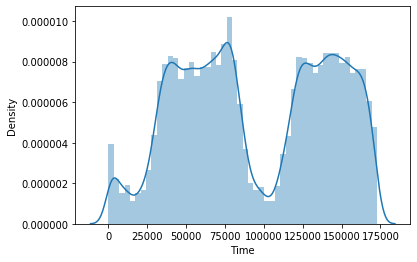

In [88]:
sns.distplot(credit_card_transactions['Time'])

In [89]:
# 3600 seconds in an hour
# 2 days worth of data
credit_card_transactions.apply(lambda x: x.Time/3600, axis=1)

0          0.000000
1          0.000000
2          0.000278
3          0.000278
4          0.000556
            ...    
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Length: 284807, dtype: float64

In [9]:
# inspect data types
# V1-V28 are columns that were transformed by PCA (Principal Component Analysis) due to confidentiality issues
credit_card_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
# get descriptive stats
credit_card_transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


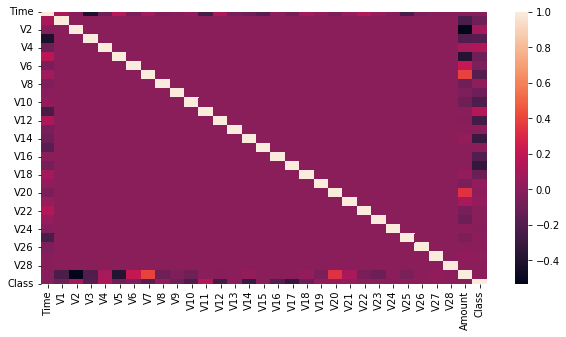

In [34]:
# inspect correlation
# low correlation
plt.figure(figsize=(10,5))
sns.heatmap(credit_card_transactions.corr())

In [22]:
# non-fraud vs fraud summary
cc_transactions_summary = credit_card_transactions.groupby('Class').describe().T

In [24]:
cc_transactions_summary

Class                     0             1
Time   count  284315.000000    492.000000
       mean    94838.202258  80746.806911
       std     47484.015786  47835.365138
       min         0.000000    406.000000
       25%     54230.000000  41241.500000
...                     ...           ...
Amount min         0.000000      0.000000
       25%         5.650000      1.000000
       50%        22.000000      9.250000
       75%        77.050000    105.890000
       max     25691.160000   2125.870000

[240 rows x 2 columns]

In [26]:
# fraudulent transaction are higher on average
cc_transactions_summary.loc[['Amount', 'Time'], :]

Class                     0              1
Amount count  284315.000000     492.000000
       mean       88.291022     122.211321
       std       250.105092     256.683288
       min         0.000000       0.000000
       25%         5.650000       1.000000
       50%        22.000000       9.250000
       75%        77.050000     105.890000
       max     25691.160000    2125.870000
Time   count  284315.000000     492.000000
       mean    94838.202258   80746.806911
       std     47484.015786   47835.365138
       min         0.000000     406.000000
       25%     54230.000000   41241.500000
       50%     84711.000000   75568.500000
       75%    139333.000000  128483.000000
       max    172792.000000  170348.000000

# <a href='32'>Missing Data</a> 

In [87]:
credit_card_transactions.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#  <a href='31'>Benford's Law vs. Credit Card Transactions</a> 
- <a href="https://www.journalofaccountancy.com/issues/2017/apr/excel-and-benfords-law-to-detect-fraud.html#:~:text=Briefly%20explained%2C%20Benford's%20Law%20maintains,leading%20digit%20with%20decreasing%20frequency.">"Benford's Law maintains that the numeral 1 will be the leading digit in a genuine data set of numbers 30.1% of the time; the numeral 2 will be the leading digit 17.6% of the time; and each subsequent numeral, 3 through 9, will be the leading digit with decreasing frequency."</a>

In [36]:
def count_first_digit(df, data_str):
    
    mask=df[data_str]>1
    data=list(df[mask][data_str])
    for i in range(len(data)):
        while data[i]>=10:
            data[i]=data[i]/10
    # import ipdb; ipdb.set_trace()
    first_digits=[int(x) for x in sorted(data)]
    unique=(set(first_digits)) # a list with unique values of first_digit list
    # container to hold count of numbers 1-9
    data_count=[]
    for i in unique:
        # get count of number
        count=first_digits.count(i)
        # append to list
        data_count.append(count)
    total_count=sum(data_count)
    
    # get percentage to compare to Benford's Law percentage
    data_percentage=[(i/total_count)*100 for i in data_count]
    return  total_count, data_count, data_percentage



# $ \sum_{i=1}^n x_{i}*p({x_i}) $ 
- x = count of first digit
- p(x) = probability of digit 1-9 according to Benford's law

In [39]:
# expected count according to Benford's Law
# E(x) = sum of x*p(x) 
def get_expected_counts(total_count):
    """Return list of expected Benford's Law counts for total sample count."""
    return [round(p * total_count / 100) for p in BENFORD]

# Benford's Law percentages for leading digits 1-9
BENFORD = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

In [40]:
total_count = count_first_digit(credit_card_transactions.query('Class == 1'), 'Amount')[0]

data_count = count_first_digit(credit_card_transactions.query('Class == 1'), 'Amount')[1]

expected_counts = get_expected_counts(count_first_digit(credit_card_transactions.query('Class == 1'), 'Amount')[0])

expected_counts_non_fraud = get_expected_counts(count_first_digit(credit_card_transactions.query('Class == 0'), 'Amount')[0])

data_count_non_fraud = count_first_digit(credit_card_transactions.query('Class == 0'), 'Amount')[1]

count = [x for x in range(9)]

# We can see that fraudulent transactions do not follow Benford's law and would confirm that these transactions are fraudulent
- We can do a Chi-square test to compare fraudulent transactions against expected transactions according to Benford's law

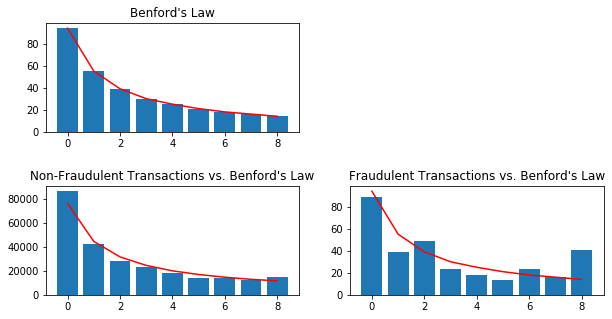

In [43]:
fig2 = plt.figure(figsize=(10,5))

fig2.tight_layout()
fig2.subplots_adjust(hspace=.5)


# Benford's Law Plot
ax1 = fig2.add_subplot(221)
ax1.bar(count, expected_counts)
ax1.plot(count, expected_counts, c='red')

# Non-Fraudulent Transactions vs. Benford's Law
ax2 = fig2.add_subplot(223)
ax2.bar(count, data_count_non_fraud)
ax2.plot(count, expected_counts_non_fraud, c='red')

# Fraudulent Transactions vs. Benford's Law
ax3 = fig2.add_subplot(224)
ax3.bar(count, data_count)
ax3.plot(count, expected_counts, c='red')

ax1.title.set_text('Benford\'s Law')
ax2.title.set_text('Non-Fraudulent Transactions vs. Benford\'s Law')
ax3.title.set_text('Fraudulent Transactions vs. Benford\'s Law')


plt.show()

# <a href='4'>Balance Dataset</a>

## <a href='41'>Imbalanced Data</a>

In [19]:
# non fraud vs. fraud
credit_card_transactions['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [20]:
credit_card_transactions['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

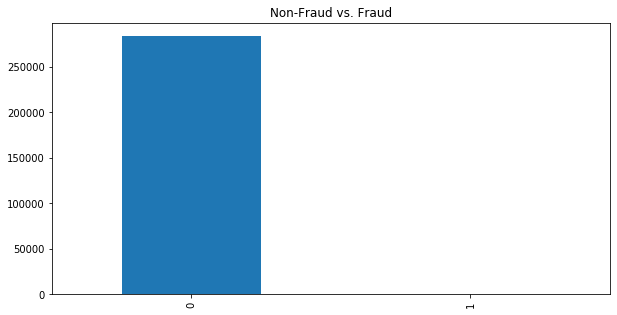

In [18]:
# non-fraudulent transactions vs. fraudulent transactions
# highly imbalanced dataset
plt.figure(figsize=(10,5))
credit_card_transactions['Class'].value_counts().plot(kind='bar', title='Non-Fraud vs. Fraud')

## <a href='42'>Applying SMOTE</a>  

In [27]:
# split data into X and y
X = credit_card_transactions.drop(columns=['Class'])
y = credit_card_transactions['Class']

In [28]:
# import SMOTE 
# oversampling balances dataset by creating synthetic samples of the minority class (fraudulent transactions)
# in order to balance dataset
from imblearn.over_sampling import SMOTE

In [29]:
sm = SMOTE()

In [31]:
# new balanced X and y data
X_bal, y_bal = sm.fit_resample(X,y)

In [32]:
# data should be equal!
y_bal.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

# <a href='5'>Models</a>

## <a href='51'>Split Dataset into Train/Test</a>

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42)

## <a href='52'>Logistic Regression</a>

In [47]:
lr = LogisticRegression()

In [51]:
lr.fit(X_train, y_train)

/Users/pythagoras/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [52]:
lr_predictions = lr.predict(X_test)

In [59]:
def plotConfMatrix(model):
    plot_confusion_matrix(model, X_test, y_test)

/Users/pythagoras/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


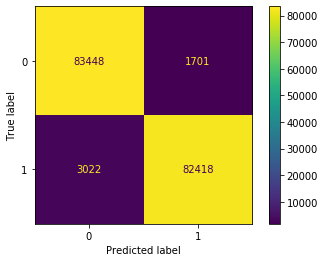

In [60]:
plotConfMatrix(lr)

In [70]:
accuracy_score(y_test, lr_predictions)

0.9723135723874341

## <a href='53'>Naive Bayes</a>

In [56]:
nb = GaussianNB()

In [57]:
nb.fit(X_train, y_train)

GaussianNB()

In [58]:
nb_predictions = nb.predict(X_test)

/Users/pythagoras/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


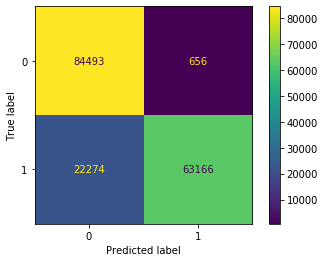

In [61]:
plotConfMatrix(nb)

In [71]:
accuracy_score(y_test, nb_predictions)

0.8655833611780361

## <a href='54'>Decision Tree</a>

In [62]:
dt = DecisionTreeClassifier()

In [63]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
dt_predictions = dt.predict(X_test)

/Users/pythagoras/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


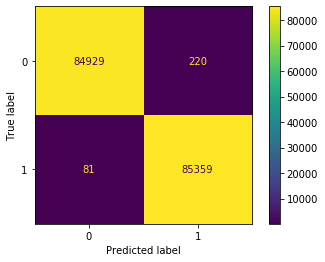

In [65]:
plotConfMatrix(dt)

In [72]:
accuracy_score(y_test, dt_predictions)

0.9982355251510941

## <a href='55'>Random Forest</a>

In [66]:
rf = RandomForestClassifier()

In [67]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
rf_predictions = rf.predict(X_test)

/Users/pythagoras/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


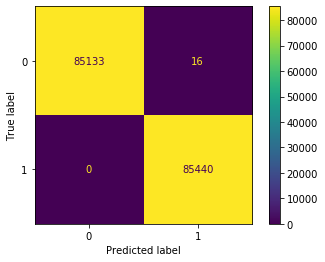

In [69]:
plotConfMatrix(rf)

In [73]:
accuracy_score(y_test, rf_predictions)

0.9999062073170016

In [81]:
 rf.predict_proba(X_test)[::, 1]

array([1., 1., 0., ..., 1., 1., 1.])

# <a href='6'>Plot ROC</a>

In [85]:
def plotROC(models, X_test, y_test):
    for model in models:
        plot_roc_curve(model, X_test, y_test)

/Users/pythagoras/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pythagoras/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/pythagoras/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictio

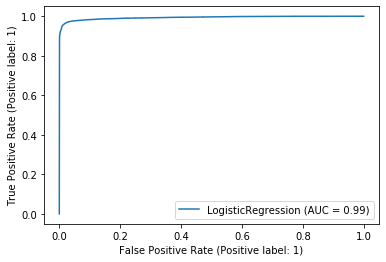

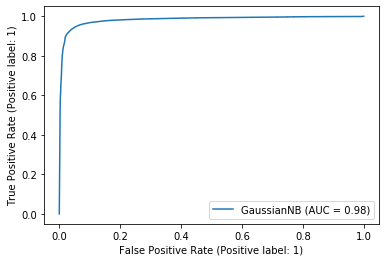

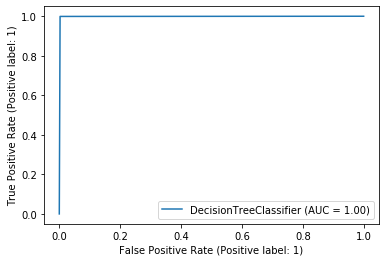

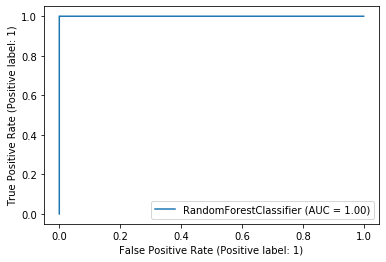

In [86]:
plotROC([lr, nb, dt, rf], X_test, y_test)

# <a href='7'>Inspect Dollar Amount Loss</a> 

## <a href='71'>Type 1 and Type 2 Error</a>
- Type 1 = False Positive
    - Transactions flagged as fraud, but were not fraud
- Type 2 = False Negative
    - Transactions not flagged as fraud, but were actually fraud

I will be analyzing Type 2/False Negatives for each model and see how much money would have been loss due to fraud if this model was put into production.

In [83]:
def falseNegativesData(y_true, y_pred, X_test):
    '''
    y_true - true values
    
    y_pred - predicted values
    
    X_test - X test values
    '''
    return X_test.iloc[np.where(((y_true==1) & (y_pred==0)))[0], :]

Random Forest would have saved us the most amount of money while Naive Bayes model would have cost the company $3 million+ dollars if it was put into production 

In [84]:

dict(zip(['Naive Bayes', 'Logistic Regression', 'Random Forest', 'Decision Tree'], list(map(lambda pred: round(falseNegativesData(y_test, pred, X_test)['Amount'].sum(), 2), [nb_predictions, lr_predictions, rf_predictions, dt_predictions]))))



{'Naive Bayes': 3252606.3,
 'Logistic Regression': 544785.28,
 'Random Forest': 0.0,
 'Decision Tree': 14715.45}

# <a href='8'>Conclusion</a> 

##  As of right now I would go with Random Forest to predict fraudulent transaction due to no money loss as a result of fraud. This means that Random Forest was able to predict all transactions that were fraudulent. This was a simple overview of how someone would want to apply machine learning to fraud detection. There are many steps that go into evaluating a model before it is put into production. In an ideal world I would go with Decision Tree since you are able to extract rules which one can use as an extra layer of security when implementing rules-based fraud detection. 

## I would love to apply the exponential distribution to this dataset since the exponential distribution models the time until an event occurs, the event being fraud in our case. First I would have to check the distribution of our "Time" variable and do some testing to see the likelihood this distribution came from an exponential distribution. 

## To further validate which model performs well I would split my data into train, test and validation with a 70/20/10 split respectively. 

Here's a thread that goes into how to do that in Python - https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn